In [2]:
# append custom system path for custom modules folder in directory
# ONLY DO THIS ONCE PER KERNEL RESET, DOING MORE THAN ONCE CREATES UNNECESSARY OVERHEAD
import sys
sys.path.insert(0, '../Modules')

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import os, os.path
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import Bunch
import cv2 as cv
import image_modifications as im # custom image modification module
import isic_data as isic

In [324]:
X = isic.get_data(type = 'none')

In [325]:
lesions_train = X[0]
lesions_test = X[1]

In [326]:
image = lesions_train.images[5] # 5
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

In [327]:
result = cv.bitwise_and(image, image, mask = thresh)
#result[thresh != 0] = [255,255,255]

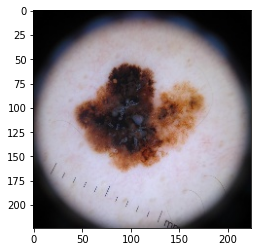

In [328]:
plt.imshow(image)

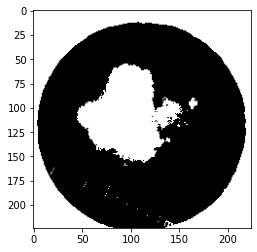

In [329]:
plt.imshow(thresh, cmap = 'gray')

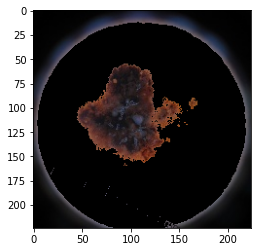

In [330]:
plt.imshow(result)

## Here it is apparent that the black corners of the image affect the masking of the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


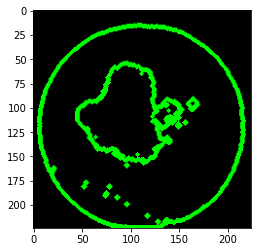

In [339]:
thresh = 100
ret,thresh_img = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(image.shape)
plt.imshow(cv.drawContours(img_contours, contours, -1, (0,255,0), 3));

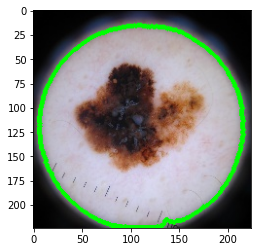

In [340]:
contours,hierarchy = cv.findContours(thresh_img,2,1)
cnt = contours
big_contour = []
max = 0
for i in cnt:
    area = cv.contourArea(i) #--- find the contour having biggest area ---
    if(area > max):
        max = area
        big_contour = i 

final = cv.drawContours(image, big_contour, -1, (0,255,0), 3)
plt.imshow(final)

In [341]:
# Simple binary threshold
_, gray = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)

# Find contours
cnts, _ = cv.findContours(gray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Generate mask
mask = np.ones(gray.shape)
mask = cv.drawContours(mask, cnts, -1, 0, cv.FILLED)


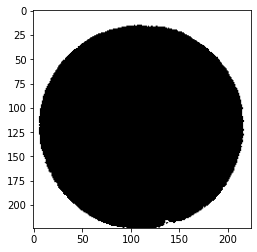

In [342]:
plt.imshow(mask, cmap = 'gray')

In [334]:
output = image.copy()
output[mask.astype(np.bool)] = 0

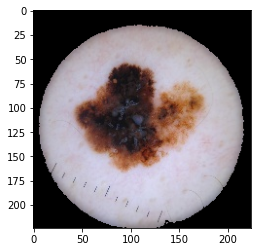

In [335]:
plt.imshow(output)

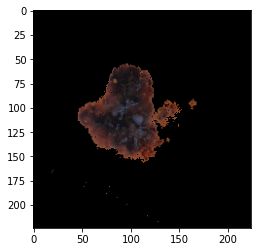

In [338]:
gray = cv.cvtColor(output, cv.COLOR_RGB2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

result = cv.bitwise_and(output, output, mask = thresh)
plt.imshow(result)

In [258]:


stencil = np.zeros(image.shape[:-1]).astype(np.uint8)
cv.fillPoly(stencil, big_contour, mask_value)

sel = stencil != mask_value
image[sel] = fill_color

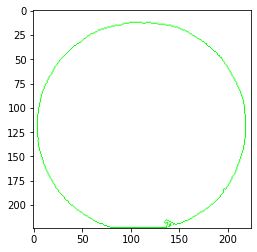

In [259]:
plt.imshow(image)